# Cleaning Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
stats = [
    'pts',
    'min',
    'fmg',
    'fga',
    'fg3m',
    'fg3a',
    'ftm',
    'fta',
    'oreb',
    'dreb',
    'ast',
    'stl',
    'tov',
    'blk'
]

In [4]:
df = pd.read_csv('player_per_game_data.csv', header = 0)

In [5]:
df.head(10)

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,ftm,fta,ft_pct,oreb,dreb,ast,tov,stl,blk,pts
0,471,1996-97,41.0,NaN,13.3,1.1,3.3,0.331,0.2,0.7,...,1.0,1.2,0.875,0.7,1.8,1.4,0.8,0.2,0.3,3.4
1,920,1996-97,83.0,33.0,30.8,2.8,5.8,0.483,0.0,0.2,...,1.5,2.4,0.650,2.7,5.2,0.8,0.9,0.8,0.2,7.2
2,243,1996-97,83.0,24.0,20.4,1.8,4.4,0.411,0.5,1.2,...,1.1,1.3,0.836,0.5,2.2,1.9,1.1,0.9,0.3,5.2
3,1425,1996-97,33.0,25.0,17.8,2.6,4.5,0.574,0.0,0.0,...,1.0,1.5,0.673,1.9,2.5,0.5,1.0,0.5,0.9,6.2
4,768,1996-97,47.0,27.0,11.1,1.4,3.8,0.374,0.0,0.1,...,1.1,1.8,0.643,0.7,1.3,0.4,0.7,0.3,0.6,4.0
5,228,1996-97,62.0,27.0,15.4,1.3,2.6,0.513,0.0,0.0,...,1.1,1.7,0.689,1.2,2.3,0.5,0.7,0.5,0.2,3.8
6,154,1996-97,45.0,30.0,13.1,0.9,2.0,0.435,0.0,0.0,...,0.5,1.1,0.420,1.3,2.4,0.3,0.6,0.4,0.2,2.2
7,673,1996-97,30.0,24.0,17.2,2.6,5.4,0.475,0.0,0.0,...,1.5,2.5,0.600,1.6,2.3,0.8,1.0,0.7,0.2,6.6
8,1059,1996-97,8.0,29.0,7.9,1.0,2.0,0.500,0.6,0.9,...,0.5,0.6,0.800,0.1,0.5,0.6,0.6,0.0,0.0,3.1
9,275,1996-97,81.0,26.0,34.3,5.4,12.7,0.423,1.8,4.7,...,2.2,2.7,0.803,0.5,2.4,2.2,2.1,0.5,0.2,14.8


In [6]:
df.tail(10)

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,ftm,fta,ft_pct,oreb,dreb,ast,tov,stl,blk,pts
10623,201163,2018-19,51.0,31.0,23.1,2.2,5.4,0.418,1.2,3.1,...,0.4,0.5,0.720,0.9,3.3,1.6,0.9,0.5,0.4,6.0
10624,1628999,2018-19,2.0,22.0,6.5,0.5,2.0,0.250,0.0,0.5,...,0.0,0.0,0.000,0.5,1.0,0.0,0.0,0.5,0.0,1.0
10625,1627812,2018-19,71.0,25.0,15.0,2.2,5.0,0.435,0.8,2.1,...,0.8,0.9,0.896,0.2,1.4,1.9,0.6,0.5,0.1,5.9
10626,1629139,2018-19,15.0,24.0,11.6,1.0,3.4,0.294,0.1,1.1,...,0.5,0.7,0.700,0.3,1.8,0.5,0.4,0.3,0.1,2.6
10627,1628380,2018-19,77.0,21.0,17.6,2.5,5.2,0.473,0.5,1.6,...,1.2,1.6,0.746,1.4,2.8,0.9,1.0,0.3,0.9,6.6
10628,203897,2018-19,63.0,24.0,34.5,8.4,18.0,0.467,1.9,5.1,...,5.0,6.0,0.832,0.6,4.0,4.5,3.4,1.0,0.4,23.7
10629,1629155,2018-19,1.0,26.0,3.8,0.0,1.0,0.000,0.0,1.0,...,0.0,0.0,0.000,0.0,0.0,0.0,1.0,1.0,0.0,0.0
10630,2585,2018-19,68.0,35.0,12.9,1.3,2.8,0.440,0.0,0.1,...,1.4,1.8,0.782,1.5,2.4,1.3,0.8,0.5,0.3,3.9
10631,1629015,2018-19,6.0,19.0,18.4,2.3,5.7,0.412,1.0,2.7,...,1.0,1.3,0.750,0.5,1.7,1.7,1.0,0.3,0.3,6.7
10632,1627753,2018-19,1.0,23.0,1.0,1.0,1.0,1.000,0.0,0.0,...,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [7]:
df.sample(10)

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,ftm,fta,ft_pct,oreb,dreb,ast,tov,stl,blk,pts
4811,200752,2006-07,78.0,20.0,27.0,4.1,9.7,0.422,0.7,1.8,...,1.9,2.7,0.727,1.2,3.3,1.3,1.8,0.9,0.9,10.8
3985,947,2005-06,72.0,31.0,43.1,11.3,25.3,0.447,1.0,3.1,...,9.4,11.5,0.814,0.6,2.6,7.4,3.4,1.9,0.1,33.0
2518,121,2001-02,65.0,39.0,13.8,2.3,5.1,0.444,0.0,0.0,...,1.4,2.1,0.701,0.9,3.1,0.5,1.0,0.3,0.7,6.0
9370,2571,2016-17,67.0,34.0,14.4,2.6,5.9,0.439,0.5,1.5,...,0.6,0.7,0.889,0.2,1.3,1.2,0.7,0.5,0.1,6.3
8311,2592,2014-15,57.0,34.0,11.7,1.3,3.5,0.368,1.1,3.1,...,0.7,0.8,0.848,0.2,0.9,0.4,0.2,0.2,0.1,4.4
7683,201575,2013-14,38.0,28.0,11.0,0.8,2.4,0.333,0.4,1.2,...,0.1,0.1,0.600,0.1,1.0,0.6,0.5,0.1,0.2,2.1
7846,203106,2013-14,26.0,25.0,24.2,3.2,8.4,0.376,0.7,2.6,...,1.0,1.8,0.553,0.6,1.7,0.8,1.0,0.5,0.2,8.0
4730,2230,2006-07,76.0,28.0,22.8,3.1,7.1,0.432,0.6,1.8,...,1.6,2.0,0.787,1.2,1.7,1.0,0.8,0.5,0.2,8.4
8725,202700,2015-16,37.0,25.0,14.8,2.4,5.5,0.439,0.4,1.5,...,0.9,1.4,0.642,1.0,1.9,1.1,1.2,0.5,0.1,6.2
8508,203133,2014-15,45.0,26.0,16.5,1.8,3.8,0.459,0.4,1.1,...,0.5,0.6,0.828,0.7,2.3,0.6,0.4,0.4,0.2,4.4


In [8]:
list(df)

['player_id',
 'season_id',
 'gp',
 'age',
 'min',
 'fgm',
 'fga',
 'fg_pct',
 'fg3m',
 'fg3a',
 'fg3_pct',
 'ftm',
 'fta',
 'ft_pct',
 'oreb',
 'dreb',
 'ast',
 'tov',
 'stl',
 'blk',
 'pts']

In [9]:
df_cleaned = df.dropna(how = 'all')

In [10]:
df_cleaned['gp'].describe()

count    10633.000000
mean        52.633782
std         25.115265
min          1.000000
25%         33.000000
50%         59.000000
75%         75.000000
max         85.000000
Name: gp, dtype: float64

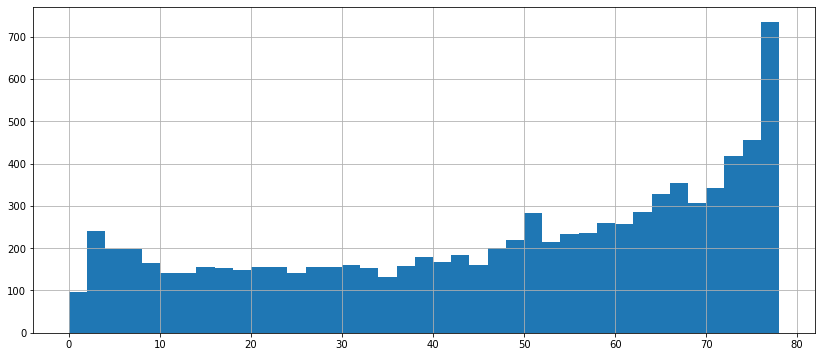

In [11]:
bin_values = np.arange(start = 0, stop = 80, step = 2)
df_cleaned['gp'].hist(bins = bin_values, figsize = [14,6])

In [12]:
min_gp = 10
df_filter = df_cleaned[df_cleaned['gp'] > min_gp]

In [13]:
df_cleaned['player_id'].count() - df_filter['player_id'].count()

971

# Normalising Data - All Seasons

In [14]:
season = (df_filter['season_id'] == '2017-18')

In [15]:
df_2018 =df_filter[season]

In [16]:
df_2018.sample(10)

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,ftm,fta,ft_pct,oreb,dreb,ast,tov,stl,blk,pts
9812,2207,2017-18,55.0,37.0,21.9,2.7,6.5,0.406,0.7,2.6,...,0.7,0.8,0.889,0.3,2.9,1.5,0.9,0.3,0.1,6.8
9761,2747,2017-18,80.0,32.0,28.1,3.0,7.4,0.403,1.8,4.8,...,0.5,0.7,0.696,0.4,2.6,1.8,1.0,0.9,0.1,8.3
9930,203090,2017-18,59.0,25.0,21.4,2.5,5.0,0.495,0.8,2.0,...,0.7,1.0,0.712,0.8,2.0,0.9,0.7,0.8,0.7,6.5
9879,202713,2017-18,12.0,30.0,4.9,0.6,1.8,0.333,0.2,0.4,...,0.6,1.1,0.538,0.1,0.8,0.2,0.3,0.1,0.0,1.9
10011,1626257,2017-18,61.0,32.0,11.9,1.4,2.2,0.642,0.0,0.0,...,0.6,1.1,0.576,1.4,2.6,0.6,0.6,0.4,1.1,3.5
10017,203498,2017-18,43.0,25.0,9.7,2.0,4.4,0.447,0.2,0.6,...,0.9,1.2,0.780,0.5,1.2,0.3,0.1,0.2,0.1,5.0
10077,2617,2017-18,14.0,38.0,5.1,0.2,1.1,0.200,0.1,0.6,...,0.1,0.1,0.500,0.2,0.5,0.4,0.1,0.0,0.1,0.6
9882,202362,2017-18,82.0,27.0,22.6,3.7,8.6,0.427,0.8,2.8,...,1.0,1.5,0.661,0.8,4.4,2.9,1.6,0.6,0.2,9.2
9995,2210,2017-18,20.0,38.0,8.2,0.6,1.4,0.444,0.1,0.4,...,0.2,0.4,0.571,0.1,0.8,0.8,0.3,0.1,0.1,1.5
10030,203500,2017-18,76.0,24.0,32.7,5.9,9.4,0.629,0.0,0.0,...,2.1,3.8,0.559,5.1,4.0,1.2,1.7,1.2,1.0,13.9


In [17]:
df_2018['pts_norm'] = (df_2018['pts'] - df_2018['pts'].min()) / (df_2018['pts'].max() - df_2018['pts'].min())

c:\users\tanay\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
df_2018.sort_values('pts_norm', ascending=False).head(10)

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,fta,ft_pct,oreb,dreb,ast,tov,stl,blk,pts,pts_norm
9781,201935,2017-18,72.0,28.0,35.4,9.0,20.1,0.449,3.7,10.0,...,10.1,0.858,0.6,4.8,8.8,4.4,1.8,0.7,30.4,1.000000
9592,203076,2017-18,75.0,25.0,36.4,10.4,19.5,0.534,0.7,2.2,...,8.0,0.828,2.5,8.6,2.3,2.2,1.5,2.6,28.1,0.923077
9888,2544,2017-18,82.0,33.0,36.9,10.5,19.3,0.542,1.8,5.0,...,6.5,0.731,1.2,7.5,9.1,4.2,1.4,0.9,27.5,0.903010
9650,203081,2017-18,73.0,27.0,36.6,8.5,19.4,0.439,3.1,8.6,...,7.4,0.916,0.8,3.6,6.6,2.8,1.1,0.4,26.9,0.882943
9737,203507,2017-18,75.0,23.0,36.7,9.9,18.7,0.529,0.6,1.9,...,8.5,0.760,2.1,8.0,4.8,3.0,1.5,1.4,26.9,0.882943
9863,201142,2017-18,68.0,29.0,34.2,9.3,18.0,0.516,2.5,6.1,...,5.9,0.889,0.5,6.4,5.4,3.0,0.7,1.8,26.4,0.866221
10028,201939,2017-18,51.0,30.0,32.0,8.4,16.9,0.495,4.2,9.8,...,5.9,0.921,0.7,4.4,6.1,3.0,1.6,0.2,26.4,0.866221
10008,201566,2017-18,80.0,29.0,36.4,9.5,21.1,0.449,1.2,4.1,...,7.1,0.737,1.9,8.2,10.3,4.8,1.8,0.3,25.4,0.832776
9676,202326,2017-18,48.0,27.0,36.2,8.5,18.0,0.470,2.2,6.1,...,8.2,0.746,2.2,10.7,5.4,5.0,1.6,1.6,25.2,0.826087
9690,1626164,2017-18,54.0,21.0,34.5,8.4,19.5,0.432,2.7,7.1,...,6.1,0.878,0.5,4.0,4.7,3.6,0.9,0.3,24.9,0.816054


In [19]:
def normalize(col):
    return (col - col.min()) / (col.max() - col.min())

In [20]:
normalize(df_2018['fgm'])

9563     0.076923
9564     0.615385
9567     0.086538
9569     0.480769
9570     0.288462
           ...   
10098    0.153846
10099    0.538462
10100    0.576923
10101    0.201923
10102    0.019231
Name: fgm, Length: 463, dtype: float64

In [21]:
cols_to_norm = [
    'pts',
    'min',
    'fgm',
    'fga',
    'fg3m',
    'fg3a',
    'ftm',
    'fta',
    'oreb',
    'dreb',
    'ast',
    'stl',
    'tov',
    'blk'
]

In [22]:
def norm_var(df):
    for col_name in cols_to_norm:
        df['{}_norm'.format(col_name)] = normalize(df[col_name])
    return df

In [23]:
df_2018_norm = norm_var(df_2018)

c:\users\tanay\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
df_2018_norm.sample(10)

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,fg3m_norm,fg3a_norm,ftm_norm,fta_norm,oreb_norm,dreb_norm,ast_norm,stl_norm,tov_norm,blk_norm
9835,1628404,2017-18,63.0,23.0,23.2,2.8,6.0,0.469,1.2,3.1,...,0.285714,0.31,0.114943,0.148515,0.137255,0.308411,0.126214,0.291667,0.14,0.115385
9856,203482,2017-18,76.0,27.0,23.4,4.2,8.4,0.497,1.4,3.7,...,0.333333,0.37,0.206897,0.227723,0.235294,0.401869,0.262136,0.333333,0.38,0.192308
10028,201939,2017-18,51.0,30.0,32.0,8.4,16.9,0.495,4.2,9.8,...,1.000000,0.98,0.632184,0.584158,0.137255,0.392523,0.592233,0.666667,0.60,0.076923
9590,1627790,2017-18,32.0,21.0,6.7,1.5,2.1,0.731,0.0,0.0,...,0.000000,0.00,0.080460,0.089109,0.156863,0.084112,0.019417,0.041667,0.06,0.153846
9613,1627742,2017-18,59.0,20.0,33.5,6.1,12.9,0.470,0.7,1.8,...,0.166667,0.18,0.379310,0.475248,0.196078,0.392523,0.378641,0.333333,0.50,0.269231
9912,1627875,2017-18,42.0,24.0,5.3,0.5,1.1,0.438,0.1,0.4,...,0.023810,0.04,0.034483,0.049505,0.039216,0.000000,0.019417,0.041667,0.02,0.000000
9782,201949,2017-18,73.0,31.0,26.6,4.2,8.4,0.503,0.8,2.5,...,0.190476,0.25,0.172414,0.217822,0.156863,0.364486,0.368932,0.416667,0.38,0.269231
9750,202697,2017-18,14.0,28.0,19.7,1.6,4.1,0.379,0.5,1.9,...,0.119048,0.19,0.091954,0.108911,0.098039,0.205607,0.116505,0.250000,0.22,0.115385
9757,1628397,2017-18,36.0,21.0,14.3,2.4,4.2,0.566,0.0,0.0,...,0.000000,0.00,0.091954,0.099010,0.294118,0.252336,0.087379,0.125000,0.20,0.153846
10076,1626145,2017-18,82.0,22.0,17.9,1.8,4.0,0.457,0.5,1.6,...,0.119048,0.16,0.103448,0.099010,0.039216,0.112150,0.271845,0.500000,0.14,0.038462


In [25]:
grouped = df_filter.groupby('season_id')
grouped['pts'].mean()

season_id
1996-97    8.623559
1997-98    8.562944
1998-99    8.232000
1999-00    8.531250
2000-01    8.357071
2001-02    8.404444
2002-03    8.299244
2003-04    8.422727
2004-05    8.573934
2005-06    8.368925
2006-07    8.683962
2007-08    8.747837
2008-09    9.014425
2009-10    8.913494
2010-11    8.661283
2011-12    8.370670
2012-13    8.441109
2013-14    8.616173
2014-15    8.635398
2015-16    8.805923
2016-17    8.960586
2017-18    8.979266
2018-19    9.361472
Name: pts, dtype: float64

In [26]:
df_new = df_filter.groupby(['season_id']).apply(norm_var)
df_new.sample(10)

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,fg3m_norm,fg3a_norm,ftm_norm,fta_norm,oreb_norm,dreb_norm,ast_norm,stl_norm,tov_norm,blk_norm
3415,2425,2003-04,32.0,24.0,7.9,0.3,1.0,0.273,0.0,0.0,...,0.000000,0.000000,0.055556,0.099010,0.152174,0.083333,0.043478,0.166667,0.046512,0.027778
1642,461,1999-00,40.0,30.0,8.3,1.1,2.6,0.423,0.1,0.1,...,0.045455,0.015873,0.053333,0.038835,0.232558,0.137255,0.049505,0.037037,0.051282,0.054054
7295,202734,2012-13,75.0,24.0,22.4,3.2,8.0,0.396,0.9,2.6,...,0.257143,0.337662,0.069767,0.078431,0.109091,0.137255,0.243243,0.291667,0.358974,0.100000
8177,201858,2014-15,23.0,30.0,8.6,0.7,2.3,0.283,0.3,1.4,...,0.083333,0.172840,0.000000,0.000000,0.000000,0.080000,0.039604,0.043478,0.045455,0.000000
303,511,1996-97,21.0,24.0,20.9,2.2,5.0,0.438,0.6,1.8,...,0.214286,0.233766,0.140625,0.106383,0.050847,0.080000,0.219298,0.037037,0.295455,0.029412
3863,2624,2004-05,78.0,24.0,21.0,2.1,4.8,0.432,0.0,0.1,...,0.000000,0.012500,0.103448,0.133333,0.205128,0.173077,0.121739,0.241379,0.152174,0.090909
7107,2581,2011-12,53.0,32.0,23.3,1.9,5.1,0.377,1.0,3.0,...,0.370370,0.434783,0.057971,0.047170,0.045455,0.096154,0.282051,0.280000,0.333333,0.000000
348,328,1996-97,22.0,38.0,10.1,0.9,2.5,0.370,0.0,0.0,...,0.000000,0.000000,0.109375,0.106383,0.152542,0.130000,0.026316,0.074074,0.113636,0.029412
8708,201971,2015-16,29.0,27.0,7.5,1.0,2.3,0.412,0.0,0.0,...,0.000000,0.000000,0.022727,0.039216,0.142857,0.100000,0.034188,0.142857,0.108696,0.027027
713,1036,1997-98,21.0,28.0,5.8,0.2,1.1,0.217,0.0,0.1,...,0.000000,0.016949,0.089744,0.087719,0.000000,0.020619,0.076190,0.076923,0.085714,0.000000


# Distance Function

In [27]:
def calc_distance(u, v):
    dist = np.sqrt(np.sum((u - v)**2))
    return dist

In [28]:
df1 = pd.read_csv('player_id_player_name.csv')

In [29]:
df2 = pd.read_csv('player_per_game_data.csv', usecols=['player_id', 'season_id', 'pts'])

In [30]:
df1.sample(5)

,player_id,player_name
225,1627762,Joel Bolomboy
96,1627863,Danuel House
74,2365,Chris Andersen
276,204001,Kristaps Porzingis
330,203077,Michael Kidd-Gilchrist


In [31]:
df2.sample(5)

,player_id,season_id,pts
7032,101145,2011-12,20.4
5966,2592,2009-10,4.1
5036,224,2007-08,3.7
6521,201158,2010-11,10.5
768,968,1997-98,3.7


In [32]:
df3 = pd.merge(df1, df2, on='player_id', how='left')

In [33]:
df3.sample(5)

,player_id,player_name,season_id,pts
1114,201945,Gerald Henderson,2016-17,9.2
442,101139,CJ Miles,2005-06,3.4
1919,2743,Kris Humphries,2009-10,7.1
979,204002,Edy Tavares,2015-16,2.3
3337,1713,Vince Carter,1998-99,18.3


In [34]:
df_2019 = df3[df3['season_id'] == '2018-19']

In [35]:
df_2019.sample(5)

,player_id,player_name,season_id,pts
1576,203925,Joe Harris,2018-19,13.7
1000,202683,Enes Kanter,2018-19,13.7
2141,1627736,Malik Beasley,2018-19,11.3
2839,1626178,Rondae Hollis-Jefferson,2018-19,8.9
2410,203101,Miles Plumlee,2018-19,4.4


In [36]:
dame_df = df_2019[df_2019['player_name'] == 'Damian Lillard']
curry_df = df_2019[df_2019['player_name'] == 'Stephen Curry']
rudy_df = df_2019[df_2019['player_name'] == 'Rudy Gobert']

In [37]:
dame_ppg = dame_df.pts.tolist()[0]
curry_ppg = curry_df.pts.tolist()[0]
rudy_ppg = rudy_df.pts.tolist()[0]

In [38]:
calc_distance(dame_ppg, curry_ppg)

1.5

In [39]:
calc_distance(dame_ppg, rudy_ppg)

9.9

In [40]:
calc_distance(curry_ppg, dame_ppg)

1.5

# Find Player Function

In [41]:
nba_stats = {'first_name': ['Lebron', 'Kyle', 'Lonzo', 'Brandon', 'Josh', 'Lance', 'Michael', 'Tyson', 'Ivica'], 
        'last_name': ['James', 'Kuzma', 'Ball', 'Ingram', 'Hart', 'Stephenson', 'Beasley', 'Chander', 'Zubac'], 
        'ppg': [28.2, 21.1, 14.3, 17.2, 18.2, 11.2, 14.2, 4.5, 6.7], 
        'apg': [12.3, 2.1, 8.9, 2.5, 3.6, 0.2, 1.8, 1.9, 1.5],
        'rpg': [7.1, 5.4, 5.5, 8.1, 3.2, 5.5, 7.7, 2.3, 8.1]}
laker_df = pd.DataFrame(nba_stats, columns = ['first_name', 'last_name', 'ppg', 'apg', 'rpg'])

In [42]:
for row in laker_df.itertuples():
    print(row.first_name, row.last_name, row.ppg)

Lebron James 28.2
Kyle Kuzma 21.1
Lonzo Ball 14.3
Brandon Ingram 17.2
Josh Hart 18.2
Lance Stephenson 11.2
Michael Beasley 14.2
Tyson Chander 4.5
Ivica Zubac 6.7


In [43]:
dataframe = pd.read_csv('player_per_game_data.csv', header = 0)

In [44]:
df_example = dataframe.sample(10)

In [45]:
for row in df_example.itertuples():
    print(row.season_id, row.player_id)

2002-03 1720
2009-10 1710
2017-18 202692
2004-05 2762
1999-00 280
2001-02 1760
2007-08 200764
1999-00 681
2011-12 201956
1996-97 255


In [46]:
def find_player(player_id, player_season):
    for row in df_example.itertuples():
        if player_season == row.season_id and player_id == row.player_id:
            return row

In [47]:
df_example

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,ftm,fta,ft_pct,oreb,dreb,ast,tov,stl,blk,pts
2921,1720,2002-03,75.0,26.0,13.9,1.9,4.6,0.426,0.0,0.0,...,0.5,0.6,0.783,0.9,2.1,0.6,0.7,0.2,0.2,4.4
6088,1710,2009-10,80.0,32.0,27.4,3.4,8.1,0.416,1.6,4.1,...,0.9,1.0,0.861,0.3,2.1,3.9,1.1,0.8,0.0,9.1
9573,202692,2017-18,64.0,26.0,16.5,2.7,6.5,0.411,0.7,2.2,...,1.7,1.9,0.863,0.3,2.7,1.0,0.9,0.6,0.1,7.7
3859,2762,2004-05,6.0,20.0,3.3,0.8,1.7,0.500,0.0,0.0,...,0.2,0.3,0.500,0.2,0.5,0.0,0.5,0.0,0.2,1.8
1485,280,1999-00,26.0,32.0,5.6,0.6,1.3,0.455,0.0,0.0,...,0.8,1.2,0.667,0.6,0.9,0.1,0.3,0.2,0.3,1.9
2316,1760,2001-02,32.0,26.0,9.3,1.3,3.8,0.342,0.0,0.3,...,0.6,0.8,0.750,0.4,1.3,1.1,0.5,0.3,0.1,3.2
5253,200764,2007-08,65.0,23.0,14.6,1.4,2.9,0.489,0.0,0.2,...,0.6,1.5,0.432,1.3,2.0,0.6,0.6,0.7,0.5,3.4
1459,681,1999-00,6.0,27.0,6.6,0.5,1.8,0.273,0.0,0.5,...,0.8,1.0,0.833,0.0,0.2,0.0,0.5,0.3,0.0,1.8
7047,201956,2011-12,65.0,24.0,20.6,2.6,6.3,0.403,0.8,2.6,...,1.1,1.7,0.685,1.0,2.5,1.0,1.0,0.6,0.3,7.1
181,255,1996-97,80.0,24.0,40.5,7.8,15.7,0.496,0.1,0.4,...,5.6,7.9,0.711,1.5,7.5,7.3,3.2,1.8,0.6,21.4


In [50]:
find_player(201942,'2009-10')

In [51]:
find_player(201942,'2019-20')

In [52]:
def find_player(df, player_id, player_season):
    for row in df.itertuples():
        if player_season == row.season_id and player_id == row.player_id:
            return row

In [53]:
dataframe.dtypes

player_id      int64
season_id     object
gp           float64
age          float64
min          float64
fgm          float64
fga          float64
fg_pct       float64
fg3m         float64
fg3a         float64
fg3_pct      float64
ftm          float64
fta          float64
ft_pct       float64
oreb         float64
dreb         float64
ast          float64
tov          float64
stl          float64
blk          float64
pts          float64
dtype: object

In [54]:
player = 2544
season = '2012-13'

In [55]:
find_player(dataframe, player, season)

Pandas(Index=7454, player_id=2544, season_id='2012-13', gp=76.0, age=28.0, min=37.9, fgm=10.1, fga=17.8, fg_pct=0.565, fg3m=1.4, fg3a=3.3, fg3_pct=0.406, ftm=5.3, fta=7.0, ft_pct=0.753, oreb=1.3, dreb=6.8, ast=7.3, tov=3.0, stl=1.7, blk=0.9, pts=26.8)

# Calculating Player Similarity

In [56]:
current_player_season = '2016-17'
current_player_id = 201950

In [57]:
df = pd.read_csv('player_per_game_data.csv', header = 0)

In [58]:
df_cleaned = df.dropna(how='all')

In [59]:
min_gp = 10
df_filter = df_cleaned[df_cleaned['gp'] > min_gp]

In [60]:
cols_to_norm = ['pts',
    'min',
    'fgm',
    'fga',
    'fg3m',
    'fg3a',
    'ftm',
    'fta',
    'oreb',
    'dreb',
    'ast',
    'stl',
    'tov',
    'blk']

In [61]:
def norm_var(df):
    for col_name in cols_to_norm:
        df['{}_norm'.format(col_name)] = normalize(df[col_name])
    return df

In [62]:
df_norm = df_filter.groupby(['season_id']).apply(norm_var)

In [63]:
jrue_pts_norm = (df_norm.loc[(df_norm['player_id'] == current_player_id) 
             & (df_norm['season_id'] == current_player_season), 
             'pts_norm']).item()

In [64]:
jrue_pts_norm

0.474025974025974

In [65]:
current_player_stats = [
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'pts_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'min_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'fgm_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'fga_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'fg3m_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'fg3a_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'ftm_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'fta_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'oreb_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'dreb_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'ast_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'stl_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'tov_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'blk_norm']).item()
]

In [66]:
print(current_player_stats)

[0.474025974025974, 0.8530259365994238, 0.5742574257425742, 0.5387931034482759, 0.3658536585365854, 0.42000000000000004, 0.1956521739130435, 0.2293577981651376, 0.1627906976744186, 0.30693069306930687, 0.6486486486486487, 0.75, 0.49999999999999994, 0.2692307692307692]


In [67]:
current_player_vector = np.array([
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'pts_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'min_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'fgm_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'fga_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'fg3m_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'fg3a_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'ftm_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'fta_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'oreb_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'dreb_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'ast_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'stl_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'tov_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'blk_norm']).item()
])

In [68]:
current_player_vector

array([0.47402597, 0.85302594, 0.57425743, 0.5387931 , 0.36585366,
       0.42      , 0.19565217, 0.2293578 , 0.1627907 , 0.30693069,
       0.64864865, 0.75      , 0.5       , 0.26923077])

In [69]:
compared_player_season = '2013-14'
compared_player_id = 203077

In [70]:
compared_player_vector = np.array([
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['season_id'] == compared_player_season), 'pts_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['season_id'] == compared_player_season), 'min_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['season_id'] == compared_player_season), 'fgm_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['season_id'] == compared_player_season), 'fga_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['season_id'] == compared_player_season), 'fg3m_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['season_id'] == compared_player_season), 'fg3a_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['season_id'] == compared_player_season), 'ftm_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['season_id'] == compared_player_season), 'fta_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['season_id'] == compared_player_season), 'oreb_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['season_id'] == compared_player_season), 'dreb_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['season_id'] == compared_player_season), 'ast_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['season_id'] == compared_player_season), 'stl_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['season_id'] == compared_player_season), 'tov_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['season_id'] == compared_player_season), 'blk_norm']).item()
])

In [71]:
compared_player_vector

array([0.21766562, 0.59833795, 0.25      , 0.25      , 0.        ,
       0.01265823, 0.20689655, 0.3030303 , 0.33333333, 0.35106383,
       0.07476636, 0.28      , 0.24324324, 0.21428571])

In [72]:
vfunc = np.vectorize(calc_distance)

In [73]:
distance_vect = vfunc(current_player_vector, compared_player_vector)

In [74]:
distance_vect

array([0.25636036, 0.25468799, 0.32425743, 0.2887931 , 0.36585366,
       0.40734177, 0.01124438, 0.0736725 , 0.17054264, 0.04413314,
       0.57388229, 0.47      , 0.25675676, 0.05494505])

In [75]:
number = np.sum(np.abs(distance_vect)) / len(distance_vect)

In [76]:
number

0.25374793324911765

# Comparing Multiple Players in a For Loop

In [77]:
player_distance = []

In [78]:
df_sample = df_norm.sample(10)

In [79]:
df_sample.head(10)

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,fg3m_norm,fg3a_norm,ftm_norm,fta_norm,oreb_norm,dreb_norm,ast_norm,stl_norm,tov_norm,blk_norm
4159,2761,2005-06,41.0,25.0,9.9,0.6,1.6,0.394,0.0,0.0,...,0.000000,0.000000,0.053191,0.095652,0.216216,0.131313,0.028571,0.120000,0.135135,0.090909
2266,369,2001-02,63.0,31.0,16.8,1.8,4.8,0.373,0.8,2.6,...,0.242424,0.325000,0.088608,0.084112,0.040000,0.182796,0.287037,0.392857,0.282051,0.057143
10295,1627740,2018-19,19.0,22.0,13.6,2.1,5.0,0.411,0.9,2.0,...,0.176471,0.151515,0.103093,0.118182,0.055556,0.281818,0.074766,0.181818,0.100000,0.037037
9370,2571,2016-17,67.0,34.0,14.4,2.6,5.9,0.439,0.5,1.5,...,0.121951,0.150000,0.065217,0.064220,0.046512,0.108911,0.099099,0.250000,0.107143,0.038462
8148,2732,2014-15,56.0,32.0,14.1,2.3,5.3,0.437,0.6,1.7,...,0.166667,0.209877,0.113636,0.117647,0.018868,0.090000,0.079208,0.130435,0.227273,0.000000
1292,763,1998-99,43.0,31.0,26.7,4.4,9.0,0.487,0.0,0.0,...,0.000000,0.000000,0.311688,0.352941,0.375000,0.413043,0.046296,0.222222,0.388889,0.230769
8627,203952,2015-16,81.0,21.0,35.1,7.3,16.0,0.459,0.7,2.3,...,0.137255,0.205357,0.602273,0.686275,0.265306,0.200000,0.170940,0.476190,0.478261,0.162162
4825,200771,2006-07,67.0,21.0,12.9,1.5,3.6,0.423,0.4,1.3,...,0.133333,0.160494,0.023256,0.028846,0.068182,0.079208,0.284483,0.238095,0.243902,0.000000
8539,202714,2014-15,55.0,25.0,15.1,2.1,5.3,0.401,0.7,2.3,...,0.194444,0.283951,0.056818,0.058824,0.018868,0.120000,0.267327,0.217391,0.204545,0.000000
1797,448,2000-01,80.0,30.0,31.7,2.8,4.6,0.614,0.0,0.0,...,0.000000,0.000000,0.192771,0.213740,0.634146,0.532609,0.285714,0.500000,0.439024,0.459459


In [80]:
for row in df_sample.itertuples():
    compared_player_vector = np.array([
    row.pts_norm,
    row.min_norm,
    row.fgm_norm,
    row.fga_norm,
    row.fg3m_norm,
    row.fg3a_norm,
    row.ftm_norm,
    row.fta_norm,
    row.oreb_norm,
    row.dreb_norm,
    row.ast_norm,
    row.stl_norm,
    row.tov_norm,
    row.blk_norm
    ])

    vfunc = np.vectorize(calc_distance)
    distance_vect = vfunc(current_player_vector, compared_player_vector)
    number = np.sum(np.abs(distance_vect)) / len(distance_vect)
    player_distance.append(number)
    player = row.player_id
    print('Done with ' + str(player) + '. Percent error was ' + str(number))

Done with 2761. Percent error was 0.3737126760342471
Done with 369. Percent error was 0.25041480017740375
Done with 1627740. Percent error was 0.29960980524313274
Done with 2571. Percent error was 0.3053843484936888
Done with 2732. Percent error was 0.2984762486231775
Done with 763. Percent error was 0.23096687357954276
Done with 203952. Percent error was 0.2166303775167729
Done with 200771. Percent error was 0.31639699219877165
Done with 202714. Percent error was 0.28089501627329533
Done with 448. Percent error was 0.24708374168431768


In [81]:
player_distance

[0.3737126760342471,
 0.25041480017740375,
 0.29960980524313274,
 0.3053843484936888,
 0.2984762486231775,
 0.23096687357954276,
 0.2166303775167729,
 0.31639699219877165,
 0.28089501627329533,
 0.24708374168431768]

In [82]:
df_sample['distance'] = player_distance

In [83]:
ranked_df = df_sample.sort_values('distance')

In [84]:
ranked_df.head(10)

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,fg3a_norm,ftm_norm,fta_norm,oreb_norm,dreb_norm,ast_norm,stl_norm,tov_norm,blk_norm,distance
8627,203952,2015-16,81.0,21.0,35.1,7.3,16.0,0.459,0.7,2.3,...,0.205357,0.602273,0.686275,0.265306,0.200000,0.170940,0.476190,0.478261,0.162162,0.216630
1292,763,1998-99,43.0,31.0,26.7,4.4,9.0,0.487,0.0,0.0,...,0.000000,0.311688,0.352941,0.375000,0.413043,0.046296,0.222222,0.388889,0.230769,0.230967
1797,448,2000-01,80.0,30.0,31.7,2.8,4.6,0.614,0.0,0.0,...,0.000000,0.192771,0.213740,0.634146,0.532609,0.285714,0.500000,0.439024,0.459459,0.247084
2266,369,2001-02,63.0,31.0,16.8,1.8,4.8,0.373,0.8,2.6,...,0.325000,0.088608,0.084112,0.040000,0.182796,0.287037,0.392857,0.282051,0.057143,0.250415
8539,202714,2014-15,55.0,25.0,15.1,2.1,5.3,0.401,0.7,2.3,...,0.283951,0.056818,0.058824,0.018868,0.120000,0.267327,0.217391,0.204545,0.000000,0.280895
8148,2732,2014-15,56.0,32.0,14.1,2.3,5.3,0.437,0.6,1.7,...,0.209877,0.113636,0.117647,0.018868,0.090000,0.079208,0.130435,0.227273,0.000000,0.298476
10295,1627740,2018-19,19.0,22.0,13.6,2.1,5.0,0.411,0.9,2.0,...,0.151515,0.103093,0.118182,0.055556,0.281818,0.074766,0.181818,0.100000,0.037037,0.299610
9370,2571,2016-17,67.0,34.0,14.4,2.6,5.9,0.439,0.5,1.5,...,0.150000,0.065217,0.064220,0.046512,0.108911,0.099099,0.250000,0.107143,0.038462,0.305384
4825,200771,2006-07,67.0,21.0,12.9,1.5,3.6,0.423,0.4,1.3,...,0.160494,0.023256,0.028846,0.068182,0.079208,0.284483,0.238095,0.243902,0.000000,0.316397
4159,2761,2005-06,41.0,25.0,9.9,0.6,1.6,0.394,0.0,0.0,...,0.000000,0.053191,0.095652,0.216216,0.131313,0.028571,0.120000,0.135135,0.090909,0.373713


In [85]:
df1 = pd.read_csv('player_info.csv')

In [86]:
df_final = pd.merge(ranked_df, df1, on=['player_id', 'season_id'], how='left').drop_duplicates()

In [87]:
df_final = df_final[['player_name', 'player_id', 'season_id', 'distance']]

In [88]:
df_final

,player_name,player_id,season_id,distance
0,Andrew Wiggins,203952,2015-16,0.216630
3,Tony Massenburg,763,1998-99,0.230967
6,Bo Outlaw,448,2000-01,0.247084
9,Charlie Ward,369,2001-02,0.250415
12,Shelvin Mack,202714,2014-15,0.280895
15,Ben Gordon,2732,2014-15,0.298476
18,NaN,1627740,2018-19,0.299610
19,Leandro Barbosa,2571,2016-17,0.305384
22,Sergio Rodriguez,200771,2006-07,0.316397
25,Jackson Vroman,2761,2005-06,0.373713


# Weighting Stat Projections

In [89]:
season_list = [
    '1996-97',
    '1997-98',
    '1998-99',
    '1999-00',
    '2000-01',
    '2001-02',
    '2002-03',
    '2003-04',
    '2004-05',
    '2005-06',
    '2006-07',
    '2007-08',
    '2008-09',
    '2009-10',
    '2010-11',
    '2011-12',
    '2012-13',
    '2013-14',
    '2014-15',
    '2015-16',
    '2016-17',
    '2017-18',
    '2018-19'
]

In [90]:
season_id = season_list[18]
print(season_id)

2014-15


In [91]:
season_id = '2014-15'
value = season_list.index(season_id)
print(value)

18


In [92]:
current_season = season_list[(season_list.index(season_id))]
print(current_season)

2014-15


In [93]:
next_season = season_list[(season_list.index(season_id) + 1)]
print(next_season)

2015-16


In [94]:
ranked_df.head(10)

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,fg3a_norm,ftm_norm,fta_norm,oreb_norm,dreb_norm,ast_norm,stl_norm,tov_norm,blk_norm,distance
8627,203952,2015-16,81.0,21.0,35.1,7.3,16.0,0.459,0.7,2.3,...,0.205357,0.602273,0.686275,0.265306,0.200000,0.170940,0.476190,0.478261,0.162162,0.216630
1292,763,1998-99,43.0,31.0,26.7,4.4,9.0,0.487,0.0,0.0,...,0.000000,0.311688,0.352941,0.375000,0.413043,0.046296,0.222222,0.388889,0.230769,0.230967
1797,448,2000-01,80.0,30.0,31.7,2.8,4.6,0.614,0.0,0.0,...,0.000000,0.192771,0.213740,0.634146,0.532609,0.285714,0.500000,0.439024,0.459459,0.247084
2266,369,2001-02,63.0,31.0,16.8,1.8,4.8,0.373,0.8,2.6,...,0.325000,0.088608,0.084112,0.040000,0.182796,0.287037,0.392857,0.282051,0.057143,0.250415
8539,202714,2014-15,55.0,25.0,15.1,2.1,5.3,0.401,0.7,2.3,...,0.283951,0.056818,0.058824,0.018868,0.120000,0.267327,0.217391,0.204545,0.000000,0.280895
8148,2732,2014-15,56.0,32.0,14.1,2.3,5.3,0.437,0.6,1.7,...,0.209877,0.113636,0.117647,0.018868,0.090000,0.079208,0.130435,0.227273,0.000000,0.298476
10295,1627740,2018-19,19.0,22.0,13.6,2.1,5.0,0.411,0.9,2.0,...,0.151515,0.103093,0.118182,0.055556,0.281818,0.074766,0.181818,0.100000,0.037037,0.299610
9370,2571,2016-17,67.0,34.0,14.4,2.6,5.9,0.439,0.5,1.5,...,0.150000,0.065217,0.064220,0.046512,0.108911,0.099099,0.250000,0.107143,0.038462,0.305384
4825,200771,2006-07,67.0,21.0,12.9,1.5,3.6,0.423,0.4,1.3,...,0.160494,0.023256,0.028846,0.068182,0.079208,0.284483,0.238095,0.243902,0.000000,0.316397
4159,2761,2005-06,41.0,25.0,9.9,0.6,1.6,0.394,0.0,0.0,...,0.000000,0.053191,0.095652,0.216216,0.131313,0.028571,0.120000,0.135135,0.090909,0.373713


In [95]:
print(current_player_id)
print(current_player_season)

201950
2016-17


In [96]:
test_df = ranked_df.iloc[0]

In [97]:
weight = (1 / test_df.distance)
print(weight)

4.616157768190076


In [98]:
stats = ['pts',
         'min',
         'fgm',
         'fga',
         'fg3m',
         'fg3a',
         'ftm',
         'fta',
         'oreb',
         'dreb',
         'ast',
         'stl',
         'tov',
         'blk']

In [99]:
projected_stats = {}

In [102]:
for col in stats:
    sum_stat = test_df[col] * weight
    projected_stats['proj_' + col] = (sum_stat / weight)

In [103]:
projected_stats

{'proj_pts': 20.7,
 'proj_min': 35.1,
 'proj_fgm': 7.299999999999999,
 'proj_fga': 16.0,
 'proj_fg3m': 0.7,
 'proj_fg3a': 2.3,
 'proj_ftm': 5.3,
 'proj_fta': 7.0,
 'proj_oreb': 1.3,
 'proj_dreb': 2.3,
 'proj_ast': 2.0,
 'proj_stl': 1.0,
 'proj_tov': 2.2,
 'proj_blk': 0.6}

In [104]:
projected_stats = {}

In [105]:
sum_stat = 0
sum_weight = 0

In [106]:
for row in ranked_df.itertuples():
    weight = (1 / row.distance)
    sum_stat += row.pts * weight
    sum_weight += weight

In [107]:
proj_points = (sum_stat / sum_weight)

In [108]:
proj_points

8.020796008584101

In [109]:
for col in stats:
    sum_stat = 0
    sum_weight = 0
    for index, row in ranked_df.iterrows():
        weight = (1 / row.distance)
        sum_stat += row[col] * weight
        sum_weight += weight
    projected_stats['player_id'] = current_player_id
    projected_stats['proj_season_id'] = season_list[(season_list.index(current_player_season) + 1)]
    projected_stats['proj_' + col] = (sum_stat / sum_weight)

In [110]:
projected_stats

{'player_id': 201950,
 'proj_season_id': '2017-18',
 'proj_pts': 8.020796008584101,
 'proj_min': 20.19011453320057,
 'proj_fgm': 2.980286824888525,
 'proj_fga': 6.573132126047651,
 'proj_fg3m': 0.46315784321814524,
 'proj_fg3a': 1.391635221284498,
 'proj_ftm': 1.5640619711997994,
 'proj_fta': 2.196183863390284,
 'proj_oreb': 0.8525093214876025,
 'proj_dreb': 2.3561597424106546,
 'proj_ast': 1.8248195105513945,
 'proj_stl': 0.6880793323791736,
 'proj_tov': 1.2121742513410583,
 'proj_blk': 0.43497255503574}

# Getting Weighted Average Using Multiple Players Next Season

In [112]:
# for col in stats:
#     sum_stat = 0
#     sum_weight = 1
#     for index, row in ranked_df.iloc[1:11].iterrows():
#         if row.season_id == '2017-18':
#             continue
#         weight = (1 / row.distance)
#         next_season = season_list[(season_list.index(row.season_id) + 1)]
#         player_next_season = find_player(ranked_df, row.player_id, next_season)
#         if player_next_season == None:
#             continue
#         sum_stat += getattr(player_next_season, col) * weight
#         sum_weight += weight
#     projected_stats['player_id'] = current_player_id
#     projected_stats['proj_season_id'] = season_list[(season_list.index(current_player_season) + 1)]
#     projected_stats['proj_' + col] = (sum_stat / sum_weight)

# Player Comparison Tool

In [113]:
def player_comparison_tool(df, current_player_season, current_player_id):
    if (((df['season_id'] == current_player_season) & (df['player_id'] == current_player_id)).any() == False):
        print('Can\'t find player with id {} and season {}'.format(current_player_id, current_player_season))
        return
    return projected_stats

In [114]:
def player_comparison_tool(df, current_player_season, current_player_id):
    if (((df['season_id'] == current_player_season) & (df['player_id'] == current_player_id)).any() == False):
        print('Can\'t find player with id {} and season {}'.format(current_player_id, current_player_season))
        return
    for row in df.itertuples():
        if current_player_season == row.season_id and current_player_id == row.player_id:
            current_player_id = row.player_id
            break
            
    return projected_stats

In [115]:
def player_comparison_tool(df, current_player_season, current_player_id):
    if (((df['season_id'] == current_player_season) & (df['player_id'] == current_player_id)).any() == False):
        print('Can\'t find player with id {} and season {}'.format(current_player_id, current_player_season))
        return
    for row in df.itertuples():
        if current_player_season == row.season_id and current_player_id == row.player_id:
            current_player_id = row.player_id
            break
      
    current_player_vector = np.array([
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'pts_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'min_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'fgm_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'fga_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'fg3m_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'fg3a_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'ftm_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'fta_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'oreb_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'dreb_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'ast_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'stl_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'tov_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'blk_norm']).item()
    ])

    print('Projecting player_id {0} for season {1}'.format(current_player_id, season_list[(season_list.index(row.season_id) + 1)]))
    
    return projected_stats

In [116]:
def player_comparison_tool(df, current_player_season, current_player_id):
    if (((df['season_id'] == current_player_season) & (df['player_id'] == current_player_id)).any() == False):
        print('Can\'t find player with id {} and season {}'.format(current_player_id, current_player_season))
        return
    for row in df.itertuples():
        if current_player_season == row.season_id and current_player_id == row.player_id:
            current_player_id = row.player_id
            break
      
    current_player_vector = np.array([
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'pts_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'min_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'fgm_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'fga_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'fg3m_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'fg3a_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'ftm_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'fta_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'oreb_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'dreb_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'ast_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'stl_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'tov_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'blk_norm']).item()
    ])

    print('Projecting player_id {0} for season {1}'.format(current_player_id, season_list[(season_list.index(row.season_id) + 1)]))
    
    player_distance = []
    
    for row in df.itertuples():
        compared_player_vector = np.array([
        row.pts_norm,
        row.min_norm,
        row.fgm_norm,
        row.fga_norm,
        row.fg3m_norm,
        row.fg3a_norm,
        row.ftm_norm,
        row.fta_norm,
        row.oreb_norm,
        row.dreb_norm,
        row.ast_norm,
        row.stl_norm,
        row.tov_norm,
        row.blk_norm
        ])
        
        vfunc = np.vectorize(calc_distance)
        distance_vect = vfunc(current_player_vector, compared_player_vector)
        number = np.sum(np.abs(distance_vect)) / len(distance_vect)
        player_distance.append(number)
    
    df['distance'] = player_distance
    
    ranked_df = df.sort_values('distance')
        
    return projected_stats

In [117]:
def player_comparison_tool(df, current_player_season, current_player_id):
    if (((df['season_id'] == current_player_season) & (df['player_id'] == current_player_id)).any() == False):
        print('Can\'t find player with id {} and season {}'.format(current_player_id, current_player_season))
        return
    for row in df.itertuples():
        if current_player_season == row.season_id and current_player_id == row.player_id:
            current_player_id = row.player_id
            break
      
    current_player_vector = np.array([
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'pts_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'min_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'fgm_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'fga_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'fg3m_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'fg3a_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'ftm_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'fta_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'oreb_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'dreb_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'ast_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'stl_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'tov_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'blk_norm']).item()
    ])

    print('Projecting player_id {0} for season {1}'.format(current_player_id, season_list[(season_list.index(row.season_id) + 1)]))
    
    player_distance = []
    
    for row in df.itertuples():
        compared_player_vector = np.array([
        row.pts_norm,
        row.min_norm,
        row.fgm_norm,
        row.fga_norm,
        row.fg3m_norm,
        row.fg3a_norm,
        row.ftm_norm,
        row.fta_norm,
        row.oreb_norm,
        row.dreb_norm,
        row.ast_norm,
        row.stl_norm,
        row.tov_norm,
        row.blk_norm
        ])
        
        vfunc = np.vectorize(calc_distance)
        distance_vect = vfunc(current_player_vector, compared_player_vector)
        number = np.sum(np.abs(distance_vect)) / len(distance_vect)
        player_distance.append(number)
    
    df['distance'] = player_distance
    
    ranked_df = df.sort_values('distance')
        
    return projected_stats

In [118]:
def player_comparison_tool(df, current_player_season, current_player_id):
    if (((df['season_id'] == current_player_season) & (df['player_id'] == current_player_id)).any() == False):
        print('Can\'t find player with id {} and season {}'.format(current_player_id, current_player_season))
        return
    for row in df.itertuples():
        if current_player_season == row.season_id and current_player_id == row.player_id:
            current_player_id = row.player_id
            break
      
    current_player_vector = np.array([
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'pts_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'min_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'fgm_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'fga_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'fg3m_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'fg3a_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'ftm_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'fta_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'oreb_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'dreb_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'ast_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'stl_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'tov_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'blk_norm']).item()
    ])

    print('Projecting player_id {0} for season {1}'.format(current_player_id, season_list[(season_list.index(row.season_id) + 1)]))
    
    player_distance = []
    
    weighted_numbers = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
    
    for row in df.itertuples():
        compared_player_vector = np.array([
        row.pts_norm,
        row.min_norm,
        row.fgm_norm,
        row.fga_norm,
        row.fg3m_norm,
        row.fg3a_norm,
        row.ftm_norm,
        row.fta_norm,
        row.oreb_norm,
        row.dreb_norm,
        row.ast_norm,
        row.stl_norm,
        row.tov_norm,
        row.blk_norm
        ])
        
        vfunc = np.vectorize(calc_distance)
        distance_vect = vfunc(current_player_vector, compared_player_vector)
        weighted_distance = distance_vect * weighted_numbers
        #number = np.sum(np.abs(distance_vect)) / len(distance_vect)
        number = np.sum(np.abs(weighted_distance)) / len(distance_vect)
        player_distance.append(number)
    
    df['distance'] = player_distance
    
    ranked_df = df.sort_values('distance')
    
    stats = ['pts',
             'min',
             'fgm',
             'fga',
             'fg3m',
             'fg3a',
             'ftm',
             'fta',
             'oreb',
             'dreb',
             'ast',
             'stl',
             'tov',
             'blk'
             ]
    
    projected_stats = {}
    
    for col in stats:
        sum_stat = 0
        sum_weight = 0
        for index, row in ranked_df.iloc[1:11].iterrows():
            # skip over the row if it was 2017-18 season because we can't take the next
            if row.season_id == '2017-18':
                continue
            # get the players next season
            weight = (1 / row.distance)
            next_season = season_list[(season_list.index(row.season_id) + 1)]
            # find the player row with the id and the next season
            player_next_season = find_player(ranked_df, row.player_id, next_season)
            # if player_next_season doesn't exist then skip
            if player_next_season == None:
                continue
            sum_stat += getattr(player_next_season, col) * weight
            sum_weight += weight
        projected_stats['player_id'] = current_player_id
        projected_stats['proj_season_id'] = season_list[(season_list.index(current_player_season) + 1)]
        projected_stats['proj_' + col] = (sum_stat / sum_weight)
        
    return projected_stats




# Projecting 2018-19 Season Stats

In [119]:
ten_players = [201935,
             203081,
             201942,
             201937,
             202339,
             203496,
             203497,
             201567,
             202331,
             202691]

In [120]:
current_player_season = '2017-18'

In [121]:
final_projections = []

In [122]:
# read in per game data from csv folder
df = pd.read_csv('player_per_game_data.csv', header = 0)

In [123]:
df_new = df[df.season_id != '2018-19']

In [124]:
df_new.sample(10)

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,ftm,fta,ft_pct,oreb,dreb,ast,tov,stl,blk,pts
9919,1628365,2017-18,14.0,20.0,18.1,3.2,7.9,0.405,0.0,0.1,...,0.7,1.5,0.476,0.8,2.3,3.8,1.2,0.9,0.3,7.1
7955,2034,2013-14,82.0,34.0,20.8,2.6,5.4,0.481,1.3,2.8,...,0.6,0.7,0.821,0.4,2.2,1.6,0.9,0.3,0.1,7.1
4901,200792,2007-08,43.0,25.0,12.8,1.4,2.9,0.488,0.0,0.0,...,1.3,1.9,0.687,0.7,1.4,0.3,1.0,0.3,0.2,4.2
10099,203897,2017-18,24.0,23.0,27.3,5.7,14.8,0.383,1.8,5.1,...,3.6,4.5,0.813,0.4,3.5,3.0,1.8,1.0,0.2,16.7
941,179,1998-99,46.0,28.0,26.0,2.5,6.3,0.393,0.7,2.3,...,1.3,1.5,0.859,0.7,1.7,1.8,1.0,0.6,0.3,7.0
2876,1563,2002-03,82.0,30.0,23.2,2.4,5.4,0.451,0.0,0.1,...,1.6,2.2,0.753,0.3,1.9,3.5,0.9,0.8,0.1,6.5
9100,1626150,2016-17,72.0,22.0,20.5,1.6,5.0,0.325,0.6,2.2,...,2.1,2.7,0.763,0.3,1.6,2.8,1.2,0.7,0.3,5.9
8630,203076,2015-16,61.0,23.0,35.5,9.2,18.6,0.493,0.6,1.8,...,5.3,7.0,0.758,2.1,8.1,1.9,2.0,1.3,2.0,24.3
6856,202962,2011-12,8.0,21.0,8.6,0.9,1.4,0.636,0.0,0.0,...,0.0,0.0,0.000,0.6,1.9,0.1,0.1,0.3,0.6,1.8
1698,431,1999-00,82.0,30.0,30.4,5.9,14.1,0.417,0.0,0.1,...,6.0,7.7,0.776,2.8,6.0,1.7,3.5,1.2,1.2,17.8


In [125]:
df_cleaned = df_new.dropna(how='any')

In [126]:
min_gp = 10
df_filter = df_cleaned[df_cleaned['gp'] > min_gp]

In [127]:
df_final = df_filter.groupby(['season_id']).apply(norm_var)

In [128]:
df_final.tail(5)

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,fg3m_norm,fg3a_norm,ftm_norm,fta_norm,oreb_norm,dreb_norm,ast_norm,stl_norm,tov_norm,blk_norm
10098,1628380,2017-18,66.0,20.0,15.8,1.7,4.4,0.398,0.5,1.7,...,0.119048,0.17,0.045977,0.059406,0.137255,0.233645,0.077670,0.125000,0.18,0.192308
10099,203897,2017-18,24.0,23.0,27.3,5.7,14.8,0.383,1.8,5.1,...,0.428571,0.51,0.413793,0.445545,0.078431,0.308411,0.291262,0.416667,0.36,0.076923
10100,2216,2017-18,59.0,36.0,25.6,6.1,12.9,0.473,0.9,2.5,...,0.214286,0.25,0.160920,0.178218,0.313725,0.457944,0.213592,0.291667,0.40,0.076923
10101,2585,2017-18,69.0,34.0,14.1,2.2,3.8,0.564,0.0,0.0,...,0.000000,0.00,0.126437,0.128713,0.254902,0.299065,0.155340,0.250000,0.20,0.076923
10102,1627753,2017-18,18.0,22.0,6.9,0.3,1.8,0.188,0.1,1.1,...,0.023810,0.11,0.045977,0.069307,0.058824,0.065421,0.009709,0.041667,0.12,0.307692


In [129]:
season_list = [
    '1996-97',
    '1997-98',
    '1998-99',
    '1999-00',
    '2000-01',
    '2001-02',
    '2002-03',
    '2003-04',
    '2004-05',
    '2005-06',
    '2006-07',
    '2007-08',
    '2008-09',
    '2009-10',
    '2010-11',
    '2011-12',
    '2012-13',
    '2013-14',
    '2014-15',
    '2015-16',
    '2016-17',
    '2017-18',
    '2018-19']

In [130]:
# function to calculate distance between two points
def calc_distance(u, v):
    dist = np.sqrt(np.sum((u - v)**2))
    return dist

# create a function to find the player and the next season
def find_player(df, player_id, season):
    # replaces for loop
    for row in df.itertuples():
        if season == row.season_id and player_id == row.player_id:
            return row

In [131]:
for baller_id in ten_players:
    current_player_id = baller_id
    current_player_season = '2017-18'
    projections = player_comparison_tool(df_final, current_player_season, current_player_id)
    if (projections == None):
        continue
    final_projections.append(projections)

Projecting player_id 201935 for season 2018-19
Projecting player_id 203081 for season 2018-19
Projecting player_id 201942 for season 2018-19
Projecting player_id 201937 for season 2018-19
Projecting player_id 202339 for season 2018-19
Projecting player_id 203496 for season 2018-19
Projecting player_id 203497 for season 2018-19
Projecting player_id 201567 for season 2018-19
Projecting player_id 202331 for season 2018-19
Projecting player_id 202691 for season 2018-19


In [132]:
final_projections

[{'player_id': 201935,
  'proj_season_id': '2018-19',
  'proj_pts': 27.43275293901888,
  'proj_min': 37.27557007949852,
  'proj_fgm': 8.739531247293517,
  'proj_fga': 19.326112130789124,
  'proj_fg3m': 2.4416014820332617,
  'proj_fg3a': 6.9208700867352,
  'proj_ftm': 7.523821728165839,
  'proj_fta': 8.988620200157476,
  'proj_oreb': 0.8919017968376578,
  'proj_dreb': 5.16723234850663,
  'proj_ast': 6.767128563607211,
  'proj_stl': 1.5624887764528956,
  'proj_tov': 3.839135611297285,
  'proj_blk': 0.545122647769738},
 {'player_id': 203081,
  'proj_season_id': '2018-19',
  'proj_pts': 23.961182438944764,
  'proj_min': 36.33941004840615,
  'proj_fgm': 8.002104609029969,
  'proj_fga': 18.622465082207462,
  'proj_fg3m': 2.1210361807969726,
  'proj_fg3a': 6.107645069732469,
  'proj_ftm': 5.836247539016859,
  'proj_fta': 6.92643264956056,
  'proj_oreb': 0.7750174504531169,
  'proj_dreb': 3.456128912076116,
  'proj_ast': 5.515011529210231,
  'proj_stl': 1.1604155587492513,
  'proj_tov': 2.8427

In [133]:
test_projections = pd.DataFrame(final_projections)

In [134]:
test_projections.sample(5)

,player_id,proj_season_id,proj_pts,proj_min,proj_fgm,proj_fga,proj_fg3m,proj_fg3a,proj_ftm,proj_fta,proj_oreb,proj_dreb,proj_ast,proj_stl,proj_tov,proj_blk
3,201937,2018-19,12.041572,28.677710,4.268700,9.623987,1.179710,3.195634,2.374711,2.829801,0.426510,2.570074,4.867850,1.093004,2.196347,0.198423
9,202691,2018-19,18.061929,32.795525,6.645460,14.856647,2.492970,6.081687,2.279072,2.726848,0.517293,3.057180,2.534957,0.871289,1.582275,0.404177
0,201935,2018-19,27.432753,37.275570,8.739531,19.326112,2.441601,6.920870,7.523822,8.988620,0.891902,5.167232,6.767129,1.562489,3.839136,0.545123
1,203081,2018-19,23.961182,36.339410,8.002105,18.622465,2.121036,6.107645,5.836248,6.926433,0.775017,3.456129,5.515012,1.160416,2.842701,0.407752
2,201942,2018-19,20.980942,34.625592,7.228287,16.349121,1.107141,3.257628,5.398346,6.510371,0.834226,3.305773,3.592760,1.001176,2.094358,0.252092


In [135]:
df_names = pd.read_csv('player_id_player_name.csv')

In [136]:
final_stat_df = pd.merge(test_projections, df_names, left_on=['player_id'], right_on=['player_id'], how='inner')

In [137]:
round(final_stat_df,1)

,player_id,proj_season_id,proj_pts,proj_min,proj_fgm,proj_fga,proj_fg3m,proj_fg3a,proj_ftm,proj_fta,proj_oreb,proj_dreb,proj_ast,proj_stl,proj_tov,proj_blk,player_name
0,201935,2018-19,27.4,37.3,8.7,19.3,2.4,6.9,7.5,9.0,0.9,5.2,6.8,1.6,3.8,0.5,James Harden
1,203081,2018-19,24.0,36.3,8.0,18.6,2.1,6.1,5.8,6.9,0.8,3.5,5.5,1.2,2.8,0.4,Damian Lillard
2,201942,2018-19,21.0,34.6,7.2,16.3,1.1,3.3,5.4,6.5,0.8,3.3,3.6,1.0,2.1,0.3,DeMar DeRozan
3,201937,2018-19,12.0,28.7,4.3,9.6,1.2,3.2,2.4,2.8,0.4,2.6,4.9,1.1,2.2,0.2,Ricky Rubio
4,202339,2018-19,15.8,32.9,5.6,13.0,1.4,3.9,3.2,3.8,0.6,3.0,5.2,1.4,2.1,0.4,Eric Bledsoe
5,203496,2018-19,9.6,27.5,3.6,8.5,1.4,4.0,1.1,1.5,0.8,3.2,1.9,1.3,1.1,0.4,Robert Covington
6,203497,2018-19,13.6,33.8,5.1,9.7,0.0,0.0,3.4,5.0,3.0,7.4,1.1,0.6,2.0,2.6,Rudy Gobert
7,201567,2018-19,16.0,31.1,5.5,12.3,1.7,4.4,3.3,4.0,1.8,6.5,1.8,0.8,1.6,0.6,Kevin Love
8,202331,2018-19,18.1,34.6,6.3,15.0,2.4,6.3,3.1,3.9,0.9,3.9,4.3,1.3,2.2,0.4,Paul George
9,202691,2018-19,18.1,32.8,6.6,14.9,2.5,6.1,2.3,2.7,0.5,3.1,2.5,0.9,1.6,0.4,Klay Thompson


In [138]:
player_df = pd.read_csv('player_info.csv')

In [139]:
player_filter = player_df[player_df['season_id'] == '2017-18']

In [140]:
player_ids_2018 = player_filter['player_id'].tolist()

In [141]:
player_ids_2018

[201166,
 203932,
 1626151,
 1628935,
 1627846,
 203940,
 201143,
 2744,
 202329,
 1626210,
 202692,
 1628409,
 203518,
 1627936,
 203458,
 1627816,
 1628035,
 203459,
 101161,
 203083,
 2738,
 201281,
 203460,
 101106,
 1626150,
 1628510,
 203952,
 1627790,
 1626148,
 203076,
 201229,
 1628469,
 1628499,
 203382,
 201167,
 203085,
 202340,
 1628389,
 203463,
 1628500,
 1627732,
 202687,
 201933,
 1626246,
 201628,
 1626171,
 203992,
 202711,
 203078,
 201148,
 1627742,
 201943,
 203464,
 1627362,
 1627744,
 201572,
 203998,
 1627854,
 1627741,
 203710,
 203468,
 101139,
 1628403,
 1626166,
 1627747,
 2546,
 1626224,
 202718,
 101112,
 1628429,
 1627767,
 1627778,
 1628449,
 1626191,
 101108,
 203991,
 203469,
 202332,
 201147,
 202709,
 201584,
 1626245,
 1626156,
 201571,
 1628391,
 1626177,
 1627745,
 203081,
 2863,
 1627814,
 1628422,
 1627772,
 1628464,
 201568,
 201980,
 201967,
 203957,
 1627863,
 203967,
 203121,
 201589,
 201954,
 1626199,
 1628021,
 204065,
 2561,
 202722,
 1

In [142]:
for baller_id in player_ids_2018:
    current_player_id = baller_id
    current_player_season = '2017-18'
    projections = player_comparison_tool(df_final, current_player_season, current_player_id)
    if (projections == None):
        continue
    final_projections.append(projections)

Projecting player_id 201166 for season 2018-19
Projecting player_id 203932 for season 2018-19
Can't find player with id 1626151 and season 2017-18
Can't find player with id 1628935 and season 2017-18
Projecting player_id 1627846 for season 2018-19
Can't find player with id 203940 and season 2017-18
Projecting player_id 201143 for season 2018-19
Projecting player_id 2744 for season 2018-19
Projecting player_id 202329 for season 2018-19
Can't find player with id 1626210 and season 2017-18
Projecting player_id 202692 for season 2018-19
Projecting player_id 1628409 for season 2018-19
Projecting player_id 203518 for season 2018-19
Projecting player_id 1627936 for season 2018-19
Projecting player_id 203458 for season 2018-19
Projecting player_id 1627816 for season 2018-19
Projecting player_id 1628035 for season 2018-19
Projecting player_id 203459 for season 2018-19
Projecting player_id 101161 for season 2018-19
Projecting player_id 203083 for season 2018-19
Projecting player_id 2738 for seas

Projecting player_id 101123 for season 2018-19
Can't find player with id 1628492 and season 2017-18
Projecting player_id 203507 for season 2018-19
Projecting player_id 203922 for season 2018-19
Projecting player_id 201609 for season 2018-19
Can't find player with id 202330 and season 2017-18
Projecting player_id 203476 for season 2018-19
Projecting player_id 202328 for season 2018-19
Projecting player_id 1627824 for season 2018-19
Projecting player_id 203084 for season 2018-19
Projecting player_id 202355 for season 2018-19
Projecting player_id 1627740 for season 2018-19
Projecting player_id 203546 for season 2018-19
Projecting player_id 101133 for season 2018-19
Projecting player_id 1628387 for season 2018-19
Projecting player_id 202697 for season 2018-19
Projecting player_id 203477 for season 2018-19
Projecting player_id 1628439 for season 2018-19
Projecting player_id 1627819 for season 2018-19
Projecting player_id 202738 for season 2018-19
Projecting player_id 1627785 for season 2018

Can't find player with id 1628493 and season 2017-18
Projecting player_id 1938 for season 2018-19
Can't find player with id 202705 and season 2017-18
Projecting player_id 201188 for season 2018-19
Projecting player_id 101162 for season 2018-19
Projecting player_id 201158 for season 2018-19
Projecting player_id 1627875 for season 2018-19
Projecting player_id 202694 for season 2018-19
Can't find player with id 1627779 and season 2017-18
Projecting player_id 203935 for season 2018-19
Projecting player_id 201596 for season 2018-19
Projecting player_id 1626209 for season 2018-19
Can't find player with id 203900 and season 2017-18
Projecting player_id 1628365 for season 2018-19
Projecting player_id 202693 for season 2018-19
Projecting player_id 1627737 for season 2018-19
Can't find player with id 203104 and season 2017-18
Projecting player_id 201578 for season 2018-19
Can't find player with id 1627850 and season 2017-18
Projecting player_id 101107 for season 2018-19
Projecting player_id 2034

Projecting player_id 2617 for season 2018-19


ZeroDivisionError: division by zero

In [ ]:
player_info_columns = [
    'player_name',
    'player_id',
    'proj_season_id'
]

In [ ]:
player_info = final_stat_df[player_info_columns]

In [ ]:
final_stat_df.to_csv('player_proj_df.csv', index=False)
player_info.to_csv('player_info_df.csv', index=False)